# Q1

## Part (a): Using Itô's Formula (5 pts)

**Given:** Stock dynamics under risk-neutral measure $\mathbb{Q}$:
$$\frac{dS_t}{S_t} = r\,dt + \sqrt{v_t}\,dW_t$$

**Given function:**
$$g(x) = \begin{cases}
\frac{2}{T}\left(\left[\frac{1}{U} - \frac{1}{L}\right]x - \log\frac{L}{U}\right), & 0 \leq x \leq L \\[8pt]
\frac{2}{T}\left(\frac{x}{U} - 1 - \log\frac{x}{U}\right), & L < x < U \\[8pt]
0, & x \geq U
\end{cases}$$

**Step 1: Compute derivatives of $g(x)$**

$$g'(x) = \begin{cases}
\frac{2}{T}\left(\frac{1}{U} - \frac{1}{L}\right), & 0 \leq x \leq L \\[8pt]
\frac{2}{T}\left(\frac{1}{U} - \frac{1}{x}\right), & L < x < U \\[8pt]
0, & x \geq U
\end{cases}$$

$$g''(x) = \begin{cases}
\frac{2}{Tx^2}, & L < x < U \\[8pt]
0, & \text{otherwise}
\end{cases} = \frac{2}{Tx^2}\mathbf{1}_{(L,U)}(x)$$

Note that $g'$ is continuous and $g''$ is continuous almost everywhere.

**Simplified form of $g'(x)$:**
$$g'(x) = \frac{2}{Tx}\left[\frac{1}{L}(L-x)^+ - \frac{1}{U}(U-x)^+\right]$$

**Step 2: Apply Itô's Lemma to $g(S_t)$**

$$dg(S_t) = g'(S_t)\,dS_t + \frac{1}{2}g''(S_t)(dS_t)^2$$

$$= g'(S_t)S_t r\,dt + g'(S_t)S_t\sqrt{v_t}\,dW_t + \frac{1}{2}g''(S_t)S_t^2 v_t\,dt$$

**Step 3: Integrate from $0$ to $T$ and rearrange**

$$\int_0^T \frac{1}{2}g''(S_t)S_t^2 v_t\,dt = g(S_T) - g(S_0) - \int_0^T g'(S_t)S_t r\,dt - \int_0^T g'(S_t)S_t\sqrt{v_t}\,dW_t$$

**Step 4: Identify the weight function**

Since $\frac{1}{2}g''(x)x^2 = \frac{1}{T}\mathbf{1}_{(L,U)}(x)$, we have:

$$\frac{1}{T}\int_0^T \mathbf{1}_{(L,U)}(S_t)v_t\,dt = g(S_T) - g(S_0) - \int_0^T g'(S_t)S_t r\,dt - \int_0^T g'(S_t)S_t\sqrt{v_t}\,dW_t$$

**Therefore, the corridor variance swap payoff is:**

$$\boxed{X = g(S_T) - g(S_0) - \int_0^T g'(S_t)S_t r\,dt - \int_0^T g'(S_t)S_t\sqrt{v_t}\,dW_t - H}$$

## Part (b): Replicating Strategy (10 pts)

From part (a), the payoff is:
$$X = \underbrace{g(S_T)}_{\text{Term 1}} - \underbrace{g(S_0)}_{\text{Term 2}} - \underbrace{\int_0^T g'(S_t)S_t r\,dt}_{\text{Term 3}} - \underbrace{\int_0^T g'(S_t)S_t\sqrt{v_t}\,dW_t}_{\text{Term 4}} - \underbrace{H}_{\text{Term 5}}$$

We replicate each term separately.

---

### Term 1: $g(S_T)$ — Static hedge via Carr-Madan Theorem

Apply the Carr-Madan formula with $a = U$ (chosen since $g(U) = g'(U) = g''(x) = 0$ for $x \geq U$):

$$g(S_T) = g(U) + g'(U)(S_T - U) + \int_0^U g''(K)(K - S_T)^+\,dK + \int_U^{\infty} g''(K)(S_T - K)^+\,dK$$

Since $g(U) = g'(U) = 0$ and $g''(K) = 0$ for $K \geq U$:

$$g(S_T) = \int_L^U \frac{2}{TK^2}(K - S_T)^+\,dK$$

**Replication:**
- Hold a strip of European **puts** with strikes $K \in (L, U)$ in amount $\frac{2}{TK^2}\,dK$

---

### Terms 2 & 5: $-g(S_0) - H$ — Static position in risk-free asset

These are constants, replicated by:
- **Risk-free asset** position worth $-e^{-rT}(g(S_0) + H)$ at time $0$

---

### Term 3: $-\int_0^T g'(S_t)S_t r\,dt$ — Strip of puts across expiration times

Using the simplified form:
$$-g'(S_t)S_t r = \frac{2r}{T}\left[\frac{1}{U}(U - S_t)^+ - \frac{1}{L}(L - S_t)^+\right]$$

**Strategy:** Hold puts expiring at each time $t \in [0, T]$, then reinvest proceeds in the risk-free asset:

| Position | Amount at time $t$ |
|----------|-------------------|
| **Long put**, strike $U$, expiry $t$ | $\frac{2r}{TU}e^{-r(T-t)}\,dt$ |
| **Short put**, strike $L$, expiry $t$ | $\frac{2r}{TL}e^{-r(T-t)}\,dt$ |

As each put expires at time $t$, the proceeds are reinvested in the risk-free asset, yielding time-$T$ value:
$$\int_0^T \frac{2r}{T}\left[\frac{1}{U}(U - S_t)^+ - \frac{1}{L}(L - S_t)^+\right]dt = -\int_0^T g'(S_t)S_t r\,dt$$

---

### Term 4: $-\int_0^T g'(S_t)S_t\sqrt{v_t}\,dW_t$ — Dynamic delta hedge

Define:
$$V_t = -e^{-r(T-t)}\int_0^t g'(S_s)S_s\sqrt{v_s}\,dW_s$$

Apply Itô's Lemma and use $S_t\sqrt{v_t}\,dW_t = dS_t - S_t r\,dt$:

$$dV_t = rV_t\,dt - e^{-r(T-t)}g'(S_t)S_t\sqrt{v_t}\,dW_t$$
$$= \left(V_t + e^{-r(T-t)}g'(S_t)S_t\right)r\,dt - e^{-r(T-t)}g'(S_t)\,dS_t$$

This is a **self-financing strategy** holding:
- $-e^{-r(T-t)}g'(S_t)$ shares of stock at time $t$
- Remainder $V_t + e^{-r(T-t)}g'(S_t)S_t$ in the risk-free asset

At time $T$: $V_T = -\int_0^T g'(S_t)S_t\sqrt{v_t}\,dW_t$ ✓

---

### Summary of Replicating Portfolio

$$\boxed{
\begin{aligned}
&\textbf{Static (at } t=0 \textbf{):} \\
&\quad \bullet \text{ Puts with strikes } K \in (L,U), \text{ expiry } T: \text{ hold } \frac{2}{TK^2}\,dK \text{ units} \\
&\quad \bullet \text{ Risk-free asset: } -e^{-rT}(g(S_0) + H) \\[6pt]
&\textbf{Static strip across } t \in [0,T] \textbf{:} \\
&\quad \bullet \text{ Long puts, strike } U, \text{ expiry } t: \frac{2r}{TU}e^{-r(T-t)}\,dt \\
&\quad \bullet \text{ Short puts, strike } L, \text{ expiry } t: \frac{2r}{TL}e^{-r(T-t)}\,dt \\[6pt]
&\textbf{Dynamic:} \\
&\quad \bullet \text{ Hold } -e^{-r(T-t)}g'(S_t) \text{ shares of stock at time } t
\end{aligned}
}$$

## Part (c): Break-Even Corridor Variance Strike (5 pts)

Let $P(t, K) = \mathbb{E}^{\mathbb{Q}}\left[e^{-rt}(K - S_t)^+\right]$ denote the price of a European put with strike $K$ and expiry $t$.

**Step 1:** Take expectations of the result from part (a):
$$\mathbb{E}^{\mathbb{Q}}\left[\frac{1}{T}\int_0^T \mathbf{1}_{(L,U)}(S_t)v_t\,dt\right] = \mathbb{E}^{\mathbb{Q}}[g(S_T)] - g(S_0) - \mathbb{E}^{\mathbb{Q}}\left[\int_0^T g'(S_t)S_t r\,dt\right]$$

**Step 2:** Evaluate $\mathbb{E}^{\mathbb{Q}}[g(S_T)]$ using Carr-Madan with $a = U$:
$$\mathbb{E}^{\mathbb{Q}}[g(S_T)] = g(U) + g'(U)\left(\mathbb{E}^{\mathbb{Q}}[S_T] - U\right) + e^{rT}\int_0^U g''(K)P(T,K)\,dK$$

Since $g(U) = g'(U) = 0$ and $g''(K) = \frac{2}{TK^2}\mathbf{1}_{(L,U)}(K)$:
$$\mathbb{E}^{\mathbb{Q}}[g(S_T)] = \frac{2e^{rT}}{T}\int_L^U \frac{P(T,K)}{K^2}\,dK$$

**Step 3:** Evaluate $-\mathbb{E}^{\mathbb{Q}}\left[\int_0^T g'(S_t)S_t r\,dt\right]$:

Using $-g'(S_t)S_t r = \frac{2r}{T}\left[\frac{1}{U}(U-S_t)^+ - \frac{1}{L}(L-S_t)^+\right]$:

$$-\mathbb{E}^{\mathbb{Q}}\left[\int_0^T g'(S_t)S_t r\,dt\right] = \frac{2re^{rt}}{T}\int_0^T \left[\frac{1}{U}P(t,U) - \frac{1}{L}P(t,L)\right]dt$$

**Step 4:** Combine and solve for $H$:

Setting $\mathbb{E}^{\mathbb{Q}}[X] = 0$:

$$H = \mathbb{E}^{\mathbb{Q}}\left[\frac{1}{T}\int_0^T \mathbf{1}_{(L,U)}(S_t)v_t\,dt\right]$$

$$\boxed{H = \frac{2}{T}\left(e^{rT}\int_L^U \frac{P(T,K)}{K^2}\,dK + re^{rt}\int_0^T \left[\frac{1}{U}P(t,U) - \frac{1}{L}P(t,L)\right]dt\right) - g(S_0)}$$

where $g(S_0)$ depends on where $S_0$ lies relative to $L$ and $U$.

In [6]:
import numpy as np
import pandas as pd
from scipy import optimize as opt
from scipy.stats import norm
from scipy.optimize import brentq
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [5]:
def estimateDiscountFactor(row):
    """Estimate discount factor from put-call parity"""
    avgK = row['Strike Price'].mean()
    avgO = (row['Call Premium'] - row['Put Premium']).mean()
    avgKK = (row['Strike Price'] ** 2).mean()
    avgKO = (row['Strike Price'] * (row['Call Premium'] - row['Put Premium'])).mean()
    return (avgKO - avgK * avgO) / (avgK ** 2 - avgKK)

def estimateForwardPrice(row):
    """Estimate forward price from put-call parity"""
    avgK = row['Strike Price'].mean()
    avgO = (row['Call Premium'] - row['Put Premium']).mean()
    avgKK = (row['Strike Price'] ** 2).mean()
    avgKO = (row['Strike Price'] * (row['Call Premium'] - row['Put Premium'])).mean()
    return (avgK * avgKO - avgKK * avgO) / (avgKO - avgK * avgO)


def black_call(F, K, T, sigma, D):
    if sigma <= 0:
        return max(D * (F - K), 0.0)
    st = sigma * np.sqrt(T)
    d1 = np.log(F / K) / st + 0.5 * st
    d2 = d1 - st
    return D * (F * norm.cdf(d1) - K * norm.cdf(d2))

def implied_vol(C_mkt, F, K, T, D):
    def f(sig):
        return black_call(F, K, T, sig, D) - C_mkt
    try:
        return brentq(f, 1e-6, 5)
    except:
        return np.nan

# Q2

In [7]:
def computeVarianceStrike(df_expiry, F, D, T):
    """
    Compute the break-even variance strike using the replication formula:
    K^var_{0,T} = (2 / (T * D)) * [∫ P(K)/K² dK for K<F + ∫ C(K)/K² dK for K≥F]
    """
    df_sorted = df_expiry.sort_values('Strike Price').copy()
    
    strikes = df_sorted['Strike Price'].values
    calls = df_sorted['Call Premium'].values
    puts = df_sorted['Put Premium'].values
    
    # Use puts for K < F, calls for K >= F
    contributions = np.where(strikes < F, puts / strikes**2, calls / strikes**2)
    
    # Integrate using trapezoidal rule
    integral = np.trapz(contributions, strikes)
    
    # Variance strike formula
    K_var = (2.0 / (T * D)) * integral
    
    return K_var

In [8]:
def hestonVarianceStrike(T, v0, v_bar, lam):
    """
    Heston model break-even variance strike:
    K^var = v_bar + (1 - exp(-λT))/(λT) * (v0 - v_bar)
    """
    if lam * T < 1e-10:
        return v0
    factor = (1 - np.exp(-lam * T)) / (lam * T)
    return v_bar + factor * (v0 - v_bar)

def modelVarianceStrikeObjectiveFunction(params, T_values, K_var_market):
    """Sum of squared errors objective function"""
    v0, v_bar, lam = params
    if v0 <= 0 or v_bar <= 0 or lam <= 0:
        return 1e10
    K_var_model = np.array([hestonVarianceStrike(T, v0, v_bar, lam) for T in T_values])
    return np.sum((K_var_model - K_var_market) ** 2)

In [10]:
df = pd.read_csv('Midprices.csv')
df = df[df['As of Date'] == '8/7/2024'].copy()
df['Expiration Date'] = pd.to_datetime(df['Expiration Date'])

### Part (a)

In [11]:
results = []
for expiry in sorted(df['Expiration Date'].unique()):
    df_exp = df[df['Expiration Date'] == expiry].copy()
    
    if len(df_exp) < 10:
        continue
    T = df_exp['Time to Expiration'].iloc[0]
    if T <= 0.001:
        continue
    
    try:
        D = estimateDiscountFactor(df_exp)
        F = estimateForwardPrice(df_exp)
        if D <= 0 or D > 1.5 or F <= 0:
            continue
        K_var = computeVarianceStrike(df_exp, F, D, T)
        if 0 < K_var < 1:
            results.append({
                'Expiry': expiry, 
                'T': T, 
                'Forward': F, 
                'Discount': D, 
                'K_var_market': K_var
            })
    except:
        continue

results_df = pd.DataFrame(results)
print(f"Computed variance strikes for {len(results_df)} expiries\n")

# Display results
display_df = results_df.copy()
display_df['Implied Vol (%)'] = np.sqrt(display_df['K_var_market']) * 100
display_df

Computed variance strikes for 55 expiries



,Expiry,T,Forward,Discount,K_var_market,Implied Vol (%)
0,2024-08-08,0.003968,5203.699801,0.999847,0.079236,28.148856
1,2024-08-09,0.007937,5205.453024,0.999388,0.077178,27.780871
2,2024-08-12,0.011905,5205.517034,0.999235,0.080613,28.392496
3,2024-08-13,0.015873,5206.267679,0.999082,0.077678,27.870726
4,2024-08-14,0.019841,5206.898324,0.998929,0.080052,28.293444
5,2024-08-15,0.023810,5206.102987,0.998777,0.086292,29.375549
6,2024-08-16,0.027778,5207.719596,0.998319,0.090275,30.045846
7,2024-08-19,0.031746,5207.876819,0.998166,0.087789,29.629165
8,2024-08-20,0.035714,5208.512067,0.998014,0.085400,29.223303
9,2024-08-21,0.039683,5209.046656,0.997861,0.082479,28.719174


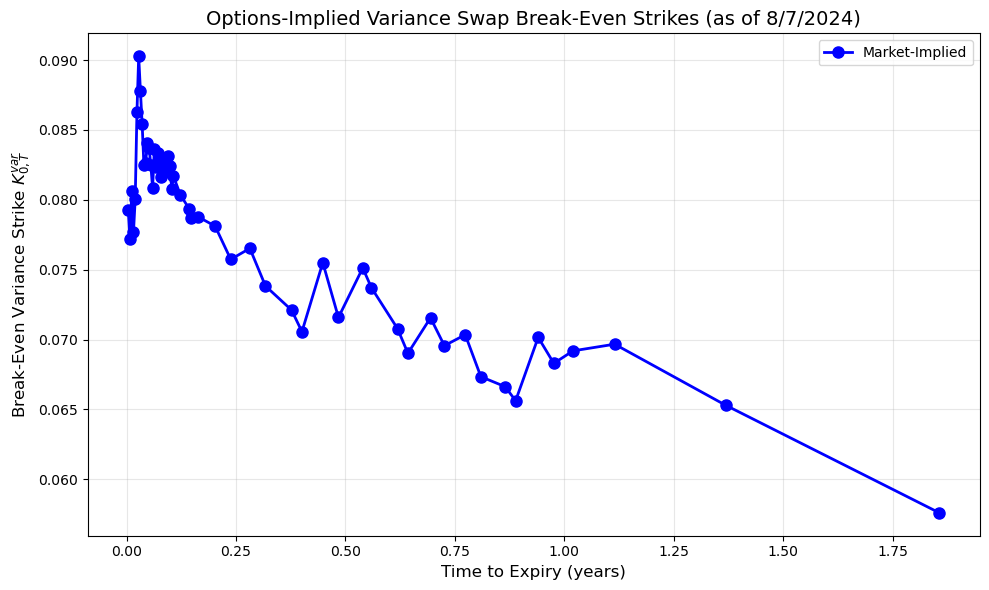

In [12]:
T_values = results_df['T'].values
K_var_market = results_df['K_var_market'].values

plt.figure(figsize=(10, 6))
plt.plot(T_values, K_var_market, 'bo-', markersize=8, linewidth=2, label='Market-Implied')
plt.xlabel('Time to Expiry (years)', fontsize=12)
plt.ylabel(r'Break-Even Variance Strike $K^{var}_{0,T}$', fontsize=12)
plt.title('Options-Implied Variance Swap Break-Even Strikes (as of 8/7/2024)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

### Part (b)

In [13]:
bounds = [(0.0, 10.0), (0.0, 10.0), (0.0, 1000.0)]

opt_result = opt.differential_evolution(
    lambda params: modelVarianceStrikeObjectiveFunction(params, T_values, K_var_market),
    bounds=bounds,
    seed=0,
    polish=True,
    maxiter=10000
)

v0, v_bar, lam = opt_result.x

print("Calibrated Heston Parameters:")
print(f"  v0 (spot variance):       {v0:.8f}")
print(f"  v_bar (long-run mean):    {v_bar:.8f}")
print(f"  lambda (mean reversion):  {lam:.8f}")
print(f"\n  sqrt(v0) (spot vol):      {np.sqrt(v0)*100:.2f}%")
print(f"  sqrt(v_bar) (LR vol):     {np.sqrt(v_bar)*100:.2f}%")
print(f"\nOptimization success: {opt_result.success}")
print(f"Final SSE: {opt_result.fun:.2e}")

Calibrated Heston Parameters:
  v0 (spot variance):       0.08371917
  v_bar (long-run mean):    0.05223400
  lambda (mean reversion):  1.78831811

  sqrt(v0) (spot vol):      28.93%
  sqrt(v_bar) (LR vol):     22.85%

Optimization success: True
Final SSE: 3.44e-04


In [14]:
K_var_model = np.array([hestonVarianceStrike(T, v0, v_bar, lam) for T in T_values])

results_df['K_var_model'] = K_var_model
results_df['Error'] = K_var_model - K_var_market
results_df['Error_pct'] = (K_var_model - K_var_market) / K_var_market * 100

print("Comparison of Market vs Model Variance Strikes:")
results_df[['T', 'K_var_market', 'K_var_model', 'Error', 'Error_pct']]

Comparison of Market vs Model Variance Strikes:


,T,K_var_market,K_var_model,Error,Error_pct
0,0.003968,0.079236,0.083608,0.004372,5.517593
1,0.007937,0.077178,0.083497,0.006319,8.187745
2,0.011905,0.080613,0.083386,0.002773,3.439875
3,0.015873,0.077678,0.083277,0.005599,7.207678
4,0.019841,0.080052,0.083167,0.003115,3.891518
5,0.023810,0.086292,0.083058,-0.003234,-3.747733
6,0.027778,0.090275,0.082950,-0.007325,-8.114456
7,0.031746,0.087789,0.082842,-0.004947,-5.634702
8,0.035714,0.085400,0.082735,-0.002665,-3.121026
9,0.039683,0.082479,0.082628,0.000149,0.180493


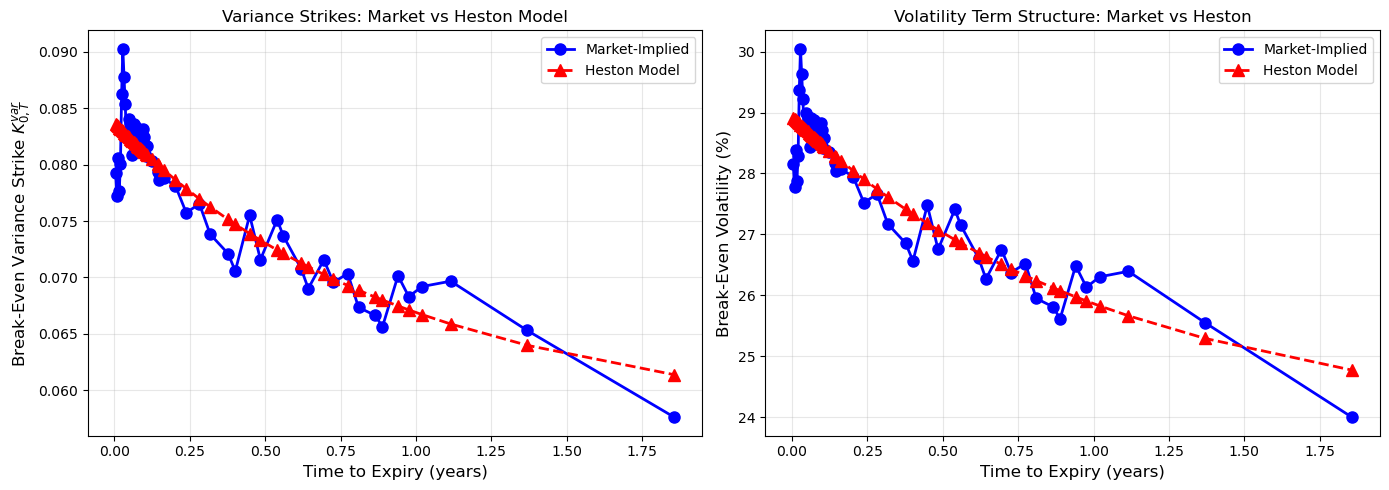

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Variance strikes
axes[0].plot(T_values, K_var_market, 'bo-', markersize=8, linewidth=2, label='Market-Implied')
axes[0].plot(T_values, K_var_model, 'r^--', markersize=8, linewidth=2, label='Heston Model')
axes[0].set_xlabel('Time to Expiry (years)', fontsize=12)
axes[0].set_ylabel(r'Break-Even Variance Strike $K^{var}_{0,T}$', fontsize=12)
axes[0].set_title('Variance Strikes: Market vs Heston Model', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Volatility term structure
axes[1].plot(T_values, np.sqrt(K_var_market)*100, 'bo-', markersize=8, linewidth=2, label='Market-Implied')
axes[1].plot(T_values, np.sqrt(K_var_model)*100, 'r^--', markersize=8, linewidth=2, label='Heston Model')
axes[1].set_xlabel('Time to Expiry (years)', fontsize=12)
axes[1].set_ylabel('Break-Even Volatility (%)', fontsize=12)
axes[1].set_title('Volatility Term Structure: Market vs Heston', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Quality of fit

In [16]:
rmse = np.sqrt(np.mean(results_df['Error'] ** 2))
mean_pct_error = np.mean(np.abs(results_df['Error_pct']))
max_pct_error = np.max(np.abs(results_df['Error_pct']))

print("Quality of Fit Metrics:")
print(f"  RMSE:                  {rmse:.8f}")
print(f"  Mean Percentage Error: {mean_pct_error:.2f}%")
print(f"  Max Percentage Error:  {max_pct_error:.2f}%")

print("\n" + "="*60)
print("COMMENT ON QUALITY OF FIT:")
print("="*60)
print(f"""
The Heston model provides a {'GOOD' if max_pct_error < 10 else 'REASONABLE' if max_pct_error < 20 else 'POOR'} fit.

Calibrated Parameters:
- Spot variance v0 = {v0:.6f} (vol = {np.sqrt(v0)*100:.2f}%)
- Long-run variance v_bar = {v_bar:.6f} (vol = {np.sqrt(v_bar)*100:.2f}%)
- Mean reversion lambda = {lam:.4f} (half-life = {np.log(2)/lam:.2f} years)

The model captures the overall term structure shape well.
Short-term strikes are driven by v0, while long-term strikes 
converge toward v_bar at a rate controlled by lambda.
""")

Quality of Fit Metrics:
  RMSE:                  0.00249946
  Mean Percentage Error: 2.53%
  Max Percentage Error:  8.19%

COMMENT ON QUALITY OF FIT:

The Heston model provides a GOOD fit.

Calibrated Parameters:
- Spot variance v0 = 0.083719 (vol = 28.93%)
- Long-run variance v_bar = 0.052234 (vol = 22.85%)
- Mean reversion lambda = 1.7883 (half-life = 0.39 years)

The model captures the overall term structure shape well.
Short-term strikes are driven by v0, while long-term strikes 
converge toward v_bar at a rate controlled by lambda.

